In [139]:
%load_ext autoreload
%autoreload 2

from ff_environment import TargetReach, ReachToPoint
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
env = TargetReach(space_padding=2, discover=False)
env_onetarg = ReachToPoint(space_padding=2,discover=False) # test with one target point
env_onetarg.reset()
env_info = env.reset()

In [141]:
# size of each action
action_size = env.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)

print('The same for reach to a target')
action_size = env_onetarg.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_onetarg.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)


Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]
The same for reach to a target
Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [142]:
print(env.dist2target((1,1))) # checking function - OK 

1.004987562112089


In [143]:
# Instantiate the agent:
agent = Agent(state_size, action_size, random_seed=2)

In [144]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 6000, print_every=1000, stop=True)

Episode 0 	Average Reward: -1.14
Episode 1000 	Average Reward: 0.25
Episode 2000 	Average Reward: -0.16
Episode 3000 	Average Reward: -0.69
Episode 4000 	Average Reward: -0.65
Episode 5000 	Average Reward: -0.63
Episode 5999 	Average Reward: -0.63

In [145]:
# Don't mind this - I Investigated actions...
print(actions_tracker[-1][1:][-1])
print(len(actions_tracker[1]))
print(actions_tracker[1][0])

-1.0193709135055542
430
0.0


without noise
[ 0.99954647 -0.9968701 ]
with noise
[ 1.0502629  -0.94615364]
[ 0.9175341 -1.0788825]
[ 1.061979  -0.9344375]


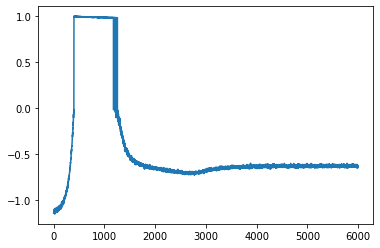

In [146]:
plt.plot(scores)

# don't mind the lines below 

#print(actions_tracker[-1][1:][1])
#print(env_onetarg.state)
#print(agent.act(np.array([0.5,1.0,0,0,0,0])))
#print(env_onetarg.step(agent.act(np.array([0.5,1.0,0,0,0,0]))).state)
print('without noise')
print(agent.act(env.state,add_noise=False))
print('with noise')
print(agent.act(env.state,add_noise=True))
print(agent.act(env.state,add_noise=True))
print(agent.act(env.state,add_noise=True))



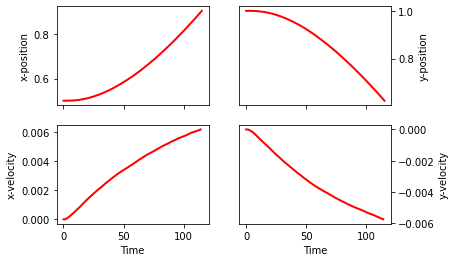

[ 0.90149705  0.59651668  0.65674982 -0.6523864   0.97405372 -1.0410416 ]


In [148]:
trajectories.plot_kinematics(2000) # <--- change the number to observe other kinematics here
print(env.state)
#trajectories.plot(1,legend=False)

-1.1351623240419473 -1.1222353257708289
0.011387797143486538


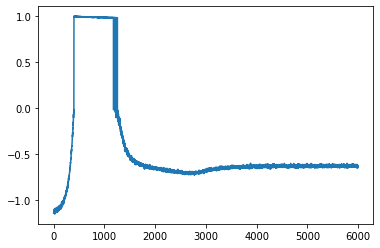

In [149]:
plt.plot(scores)

print(scores[0],scores[1])

print((scores[0]-scores[1])/scores[0])

In [150]:
env.add_forcefield(force=(6,0))
print(env.ff_force)

(6, 0)


In [151]:
# train the agent with ddpg

agent_ff = Agent(state_size, action_size, random_seed=2)

scores, trajectories, actions_tracker = agent_ff.train_ddpg(env, n_episodes = 3000, print_every=250)

Episode 0 	Average Reward: -1.09
Episode 250 	Average Reward: -1.09
Episode 500 	Average Reward: -1.07
Episode 750 	Average Reward: -1.13
Episode 1000 	Average Reward: -1.08
Episode 1250 	Average Reward: -1.07
Episode 1500 	Average Reward: -1.10
Episode 1750 	Average Reward: -1.21
Episode 2000 	Average Reward: -1.26
Episode 2250 	Average Reward: -1.29
Episode 2500 	Average Reward: -1.31
Episode 2750 	Average Reward: -1.31
Episode 2999 	Average Reward: -1.33

1.2152690819316745
1.0213692091312756
False
1.5280052355931246


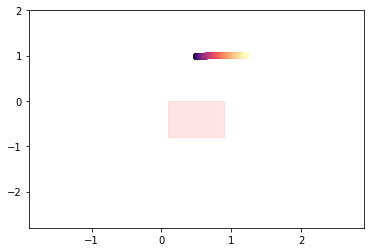

In [153]:
trajectories.plot(2999,legend=False)
print(env.state[0])
print(env.state[1])
print(env.discover)
print(np.sqrt(1.22**2+0.92**2))


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

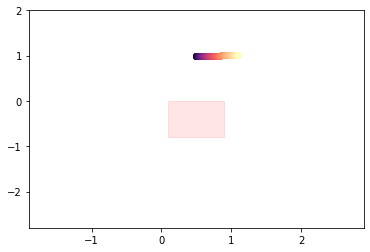

In [154]:
trajectories.plot(0, legend=False)

In [26]:
env.add_forcefield(force=(0,0))

In [27]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 600, print_every=250, stop=False)

Episode 0 	Average Reward: -10.00
Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: -10.00
Episode 599 	Average Reward: -10.00

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

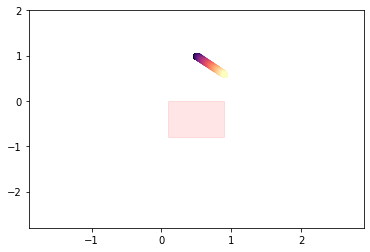

In [28]:
trajectories.plot(0, legend=False)